In [36]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D
import random

# **Data preparation**

In [22]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [23]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


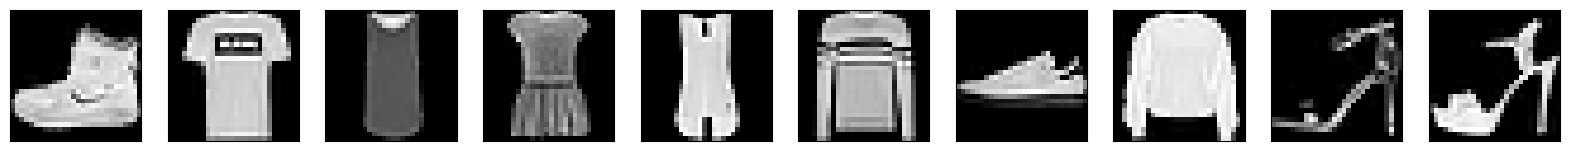

In [24]:
fig, axes = plt.subplots(ncols=10, sharex=False,
    sharey=True, figsize=(20, 8))
for i in range(10):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [25]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# **Model creating**

In [38]:
model_3 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(28,28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Conv2D(64, (3,3), padding='same', input_shape=(28,28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),

    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0         
                                                                 
 dense_12 (Dense)            (None, 256)              

In [39]:
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
model_3.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test) )

Epoch 1/100
469/469 [==============================] - 91s 192ms/step - loss: 0.4523 - accuracy: 0.8365 - val_loss: 0.3459 - val_accuracy: 0.8744
Epoch 2/100
469/469 [==============================] - 86s 184ms/step - loss: 0.2855 - accuracy: 0.8951 - val_loss: 0.2883 - val_accuracy: 0.8959
Epoch 3/100
469/469 [==============================] - 88s 188ms/step - loss: 0.2348 - accuracy: 0.9130 - val_loss: 0.2644 - val_accuracy: 0.9030
Epoch 4/100
469/469 [==============================] - 88s 188ms/step - loss: 0.2024 - accuracy: 0.9238 - val_loss: 0.2444 - val_accuracy: 0.9113
Epoch 5/100
469/469 [==============================] - 88s 187ms/step - loss: 0.1716 - accuracy: 0.9359 - val_loss: 0.2486 - val_accuracy: 0.9134
Epoch 6/100
469/469 [==============================] - 86s 184ms/step - loss: 0.1427 - accuracy: 0.9469 - val_loss: 0.2467 - val_accuracy: 0.9157
Epoch 7/100
469/469 [==============================] - 88s 188ms/step - loss: 0.1196 - accuracy: 0.9555 - val_loss: 0.2738 -

# **Test Accuracy**

In [43]:
test_loss, test_acc = model_3.evaluate(x_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 1.0248 - accuracy: 0.9162


# **Predictions and visualization**

In [44]:
predictions = model_3.predict(x_test)
predictions.shape
predictions[0]

313/313 [==============================] - 6s 19ms/step


array([1.44658245e-33, 1.12952664e-24, 2.55982583e-34, 6.27161914e-34,
       9.14218519e-35, 4.19481620e-22, 2.89273173e-32, 3.57994624e-24,
       2.38493845e-33, 9.99999940e-01], dtype=float32)

In [13]:
np.argmax(predictions[0])

9

In [45]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[9]

'Ankle boot'

In [57]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot= plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

<ipython-input-59-1d2e7d273712>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_rows, 2*num_cols, 2*i+1)


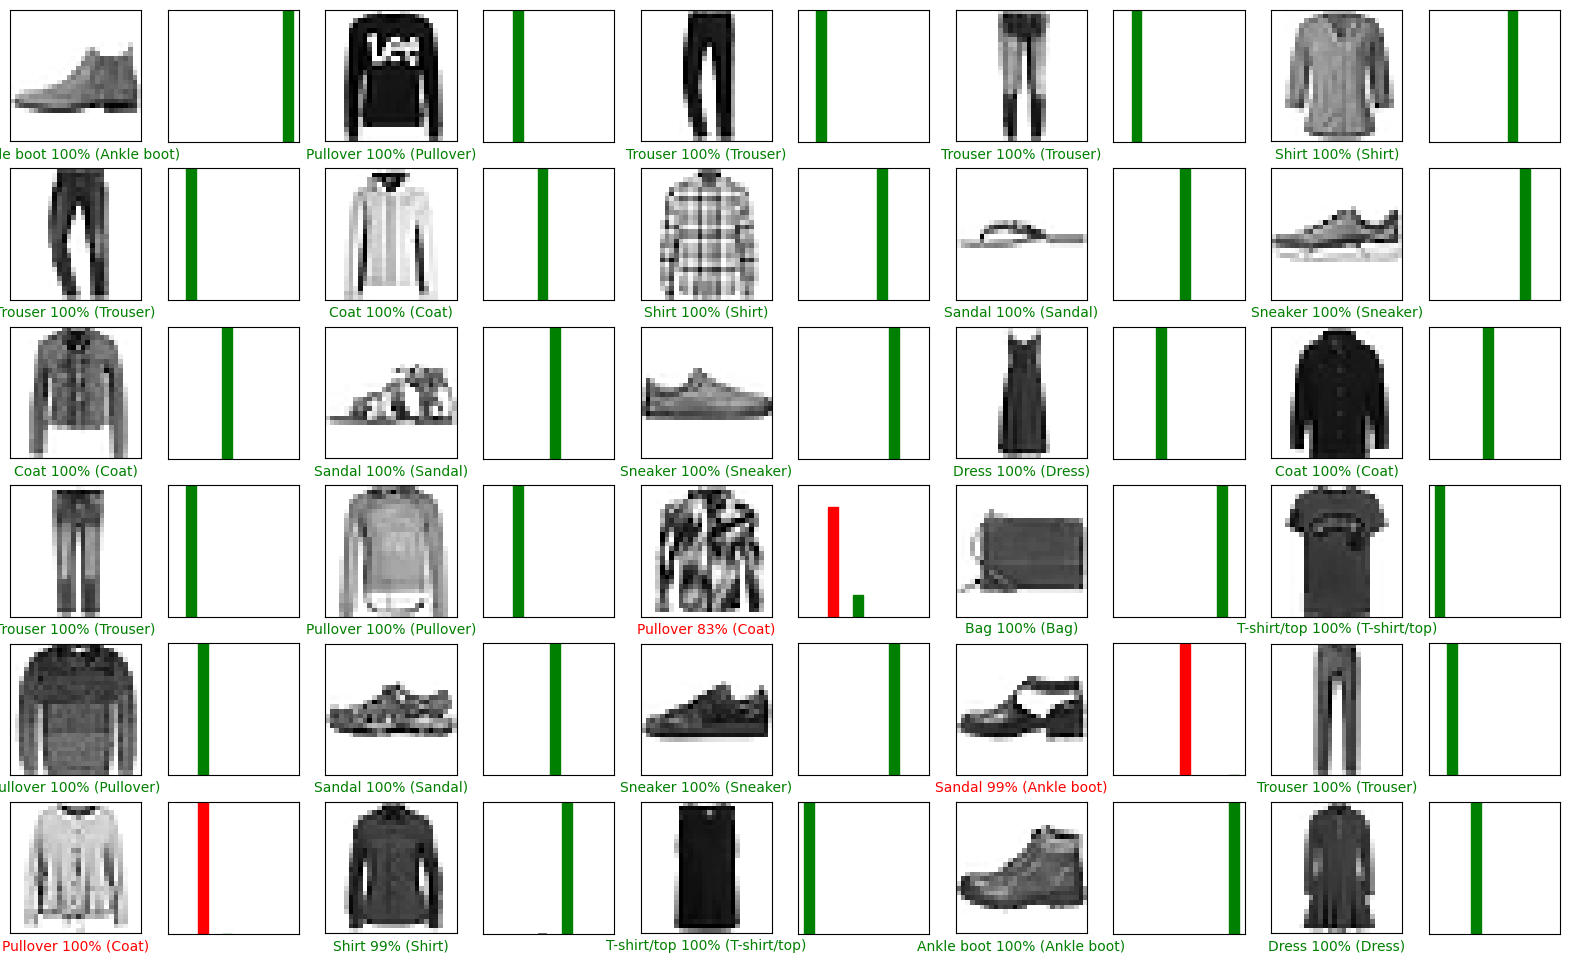

In [59]:
num_rows = 6
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions of the first 30 images")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)


# **Confusion Matrix**

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

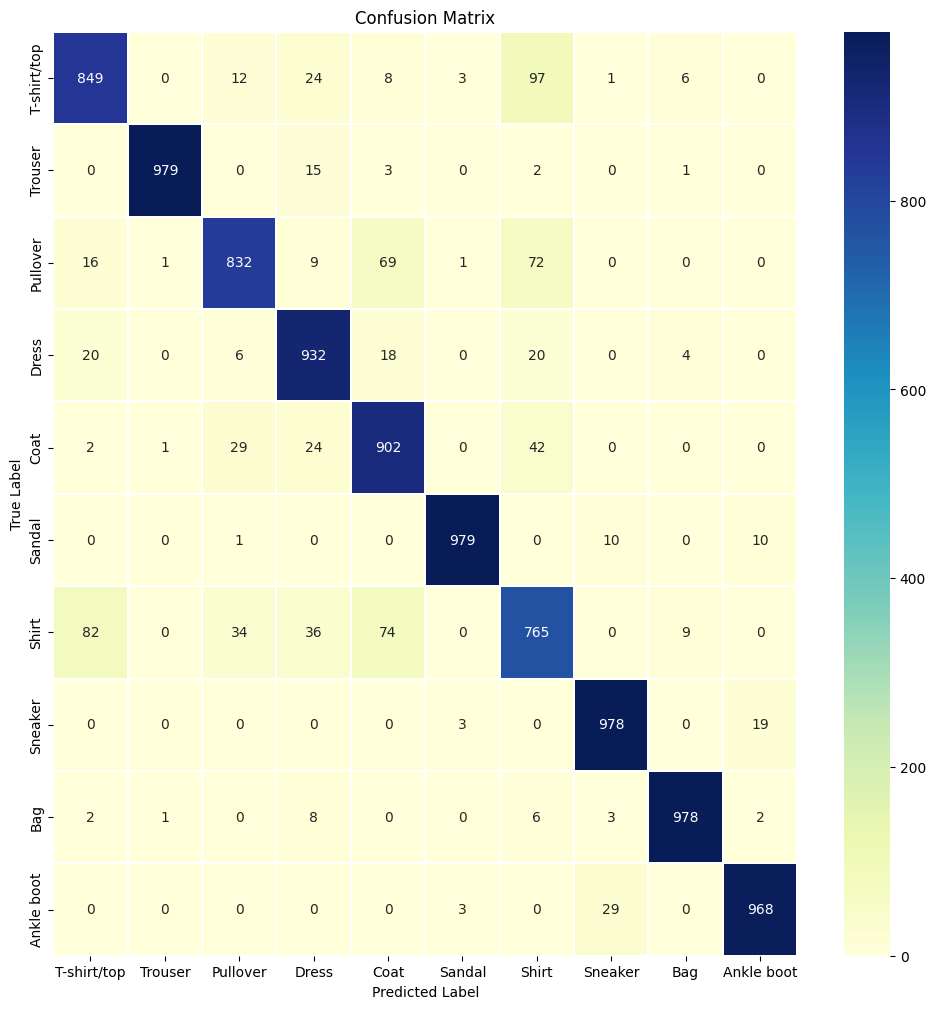

In [75]:
y_pred_classes = np.argmax(predictions, axis = 1)
y_test = y_test.reshape(-1,1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "YlGnBu", linecolor="white", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names);
plt.show()